In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('datasets/boston_housing.csv', usecols=['rm','lstat','crim','ptratio','tax','rad', 'nox', 'medv'])

- rm: average number of rooms per dwelling.
- lstat: lower status of the population (percent).
- crim: per capita crime rate by town.
- ptratio: pupil-teacher ratio by town.
- tax: full-value property-tax rate per $10,000.
- rad: index of accessibility to radial highways.
- nox: nitrogen oxides concentration (parts per 10 million).
- medv: median value of owner-occupied homes in $1000s.

<Axes: >

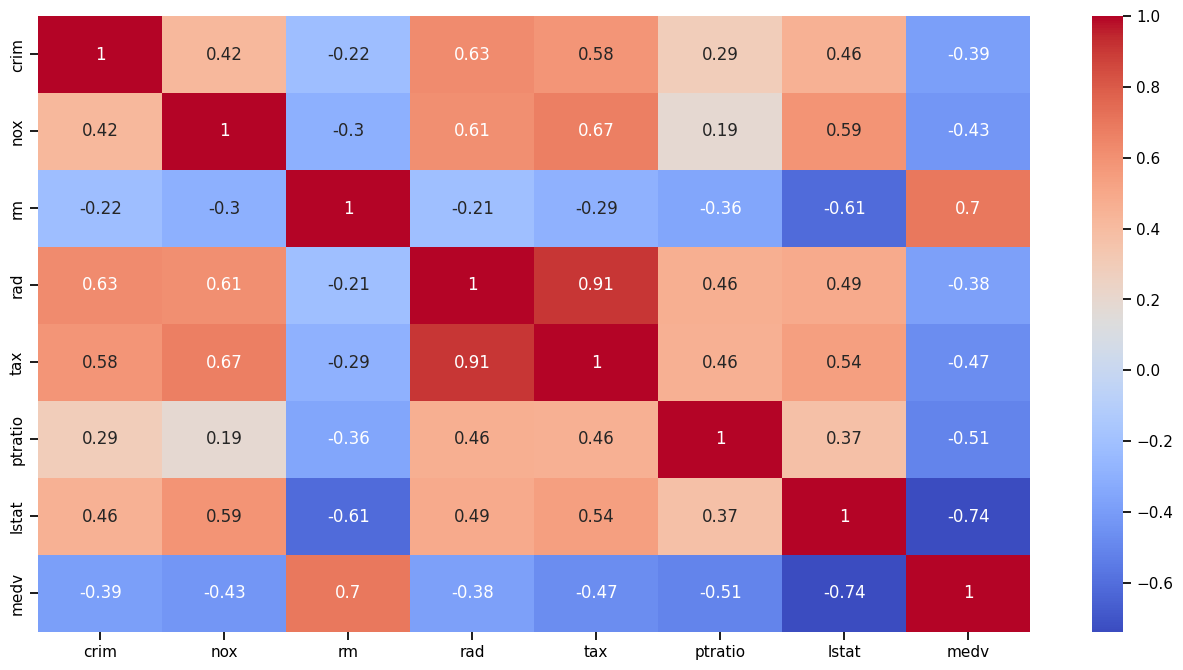

In [33]:
sns.set_theme(rc={'figure.figsize':(16,8)}, style=None)
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')


###  Define feature, target and holdout sets

In [34]:
# Select the desired columns
features = df[['rm','lstat','crim','ptratio','tax','rad', 'nox']].copy()

# Add new columns by transforming 'rm'
features['rm_2'] = features['rm'] ** 2
features['rm_3'] = features['rm'] ** 3

# # Add new columns by transforming 'lstat'
features['lstat_log'] = np.log(features['lstat'])

# Add new columns by transforming 'crim'
features['crim_log'] = np.log(features['crim'])
features['crim_2'] = features['crim'] ** 2
features['crim_3'] = features['crim'] ** 3


# Assign our target 
target = df['medv'].values

# Split dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [35]:
# Perform Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

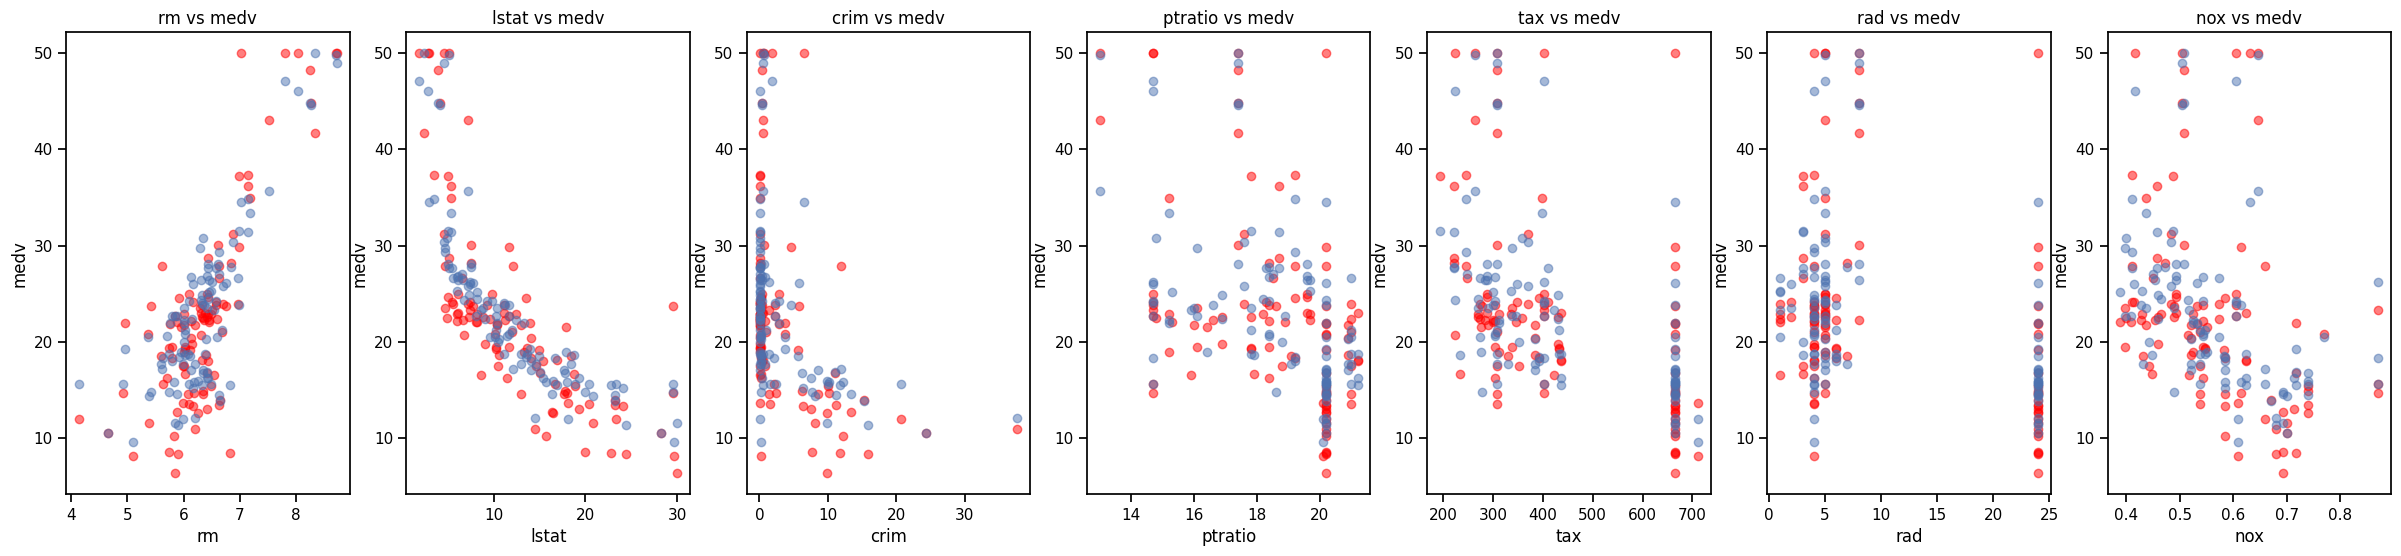

In [36]:
# Use our linear regression model to predict new y values
y_pred = lr.predict(X_test)

fig, axs = plt.subplots(1, len(X_test.columns[0:7]), figsize=(30, 6))


for index, column in enumerate(X_test.columns[0:7]):
    axs[index].scatter(X_test[column], y_test, alpha = 0.5, color='red')
    axs[index].scatter(X_test[column], y_pred, label = 'Predicted', alpha = 0.5)
    axs[index].set_xlabel(column)
    axs[index].set_ylabel("medv")
    axs[index].set_title(f"{column} vs medv")


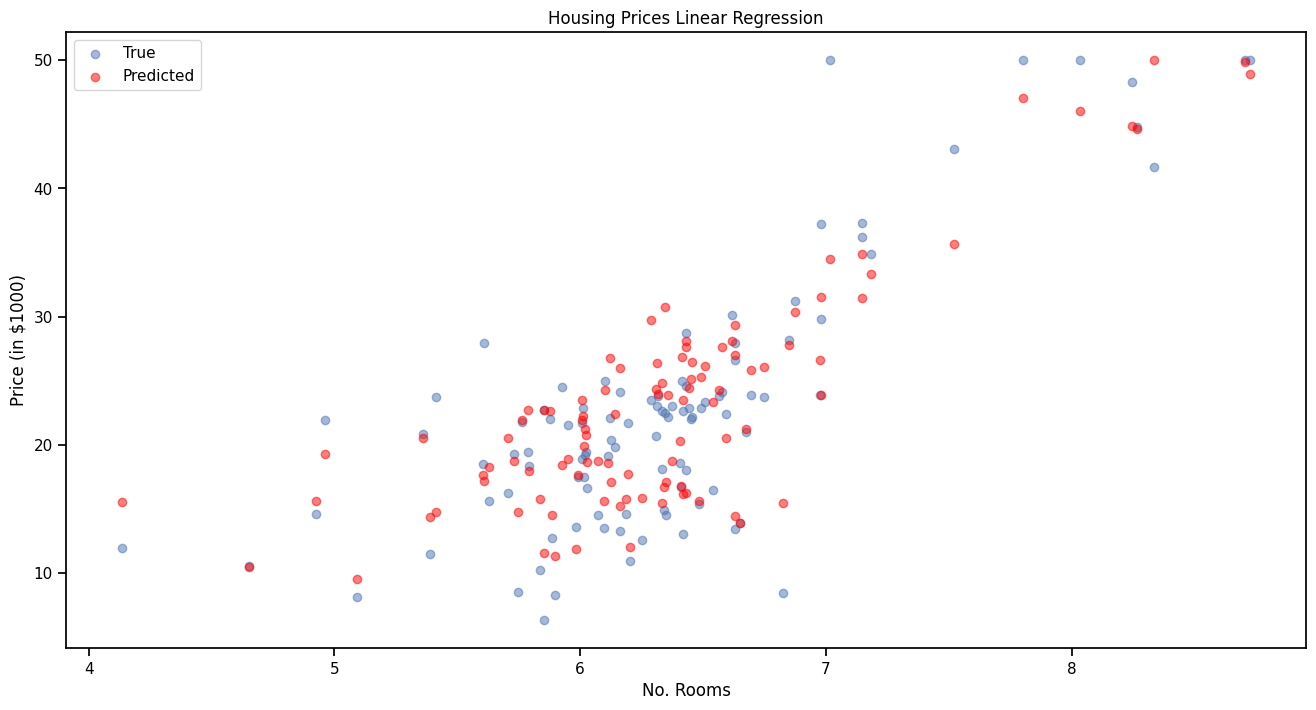

In [37]:
plt.scatter(X_test['rm'], y_test, label = 'True', alpha = 0.5)
plt.scatter(X_test['rm'], y_pred, color = 'red', label = 'Predicted', alpha = 0.5)

# Set the labels and title
plt.xlabel('No. Rooms')
plt.ylabel('Price (in $1000)')
plt.title('Housing Prices Linear Regression')

# Add a legend to the plot
plt.legend()
# Show the plot
plt.show()

In [38]:
print(f'Score: {lr.score(X_test, y_test)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


Score: 0.8570379332411628
RMSE: 3.7587987243774177
